# Agrupamiento por jerarquía

**Referencias**

* [A demo of structured Ward hierarchical clustering on an image of coins](https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_ward_segmentation.html)
* [Plot Hierarchical Clustering Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

In [3]:
#!pip install scikit-image

In [1]:
from skimage.data import coins
from sklearn.feature_extraction.image import grid_to_graph
import matplotlib.pyplot as plt

In [2]:
import time as time
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [3]:
from scipy.cluster.hierarchy import dendrogram

## Datos

In [4]:
from crea_tabla import *

In [16]:
datos_1, originales = obtén_tabla_datos(conjuntos=30, rescale = 0.6)

Leyendo numpy...
Organizando renglones...
Creando tabla de datos...
Terminado


In [17]:
c_eliminadas = ["f"]
datos_1.drop(c_eliminadas, axis = 1, inplace = True)

In [18]:
image_original = datos_1[['R', 'G', 'B']].to_numpy().reshape(originales[30][:,:,:3].shape)

In [19]:
image_original.shape

(578, 772, 3)

In [20]:
from PIL import Image
from matplotlib import cm

im = Image.fromarray(image_original.astype(np.uint8) )
orig_coins = im.convert('L')
orig_coins = np.array(orig_coins)

In [21]:
orig_coins.shape

(578, 772)

## Matriz de conectividad

Para tomar en cuenta la posición del valor en la imagen se calcula una máscara, que coloca unos cuando los pixeles son adyacentes.

In [22]:
# Matriz de conectividad con representación rala
connectivity = grid_to_graph(*orig_coins.shape)
print("Dimensiones", connectivity.shape)
connectivity

Dimensiones (446216, 446216)


<446216x446216 sparse matrix of type '<class 'numpy.int32'>'
	with 2228380 stored elements in COOrdinate format>

In [23]:
# Extraemos sólo una esquina para pasarla a representación densa
esquina = connectivity.tocsr()[0:50,0:50].toarray()

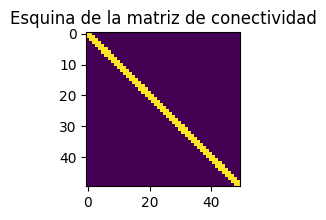

In [24]:
plt.figure(figsize=(2, 2))
plt.imshow(esquina)
plt.title("Esquina de la matriz de conectividad")
pass

## Agrupamiento aglomerativo

Del demo de
Vincent Michel, 2010 y Alexandre Gramfort, 2011

In [32]:
print("Compute structured hierarchical clustering...")
st = time.time()

# Preparación del algoritmo
n_clusters = 4  # number of regions
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward", connectivity=connectivity,
    compute_distances=True
)

# Dar formato requerido a los datos
X = np.reshape(orig_coins, (-1, 1))
# Entrenar
ward = ward.fit(X)

# Resultados
label = np.reshape(ward.labels_, orig_coins.shape)
print(f"Elapsed time: {time.time() - st:.3f}s")
print(f"Number of pixels: {label.size}")
print(f"Number of clusters: {np.unique(label).size}")

Compute structured hierarchical clustering...
Elapsed time: 28.541s
Number of pixels: 446216
Number of clusters: 4


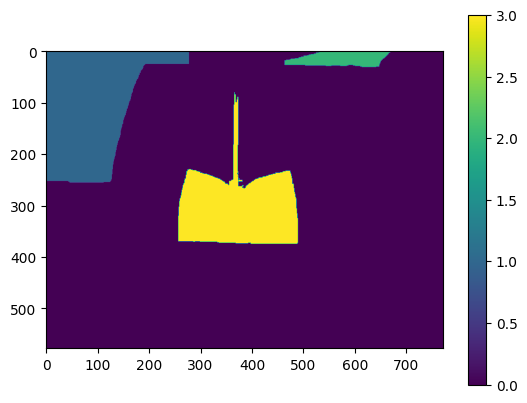

In [33]:
# Graficar grupos
plt.imshow(label)
plt.colorbar()

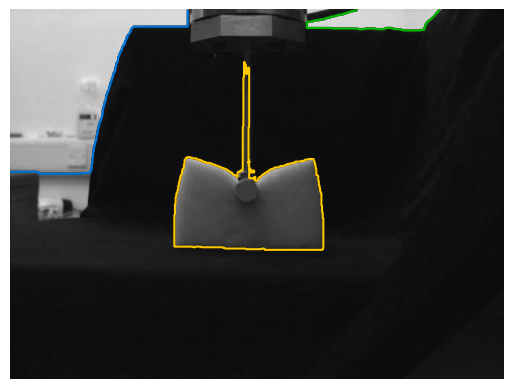

In [34]:
# Graficar contornos de grupos
plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(
        label == l,   # Pixeles con etiqueta l
        colors=[
            plt.cm.nipy_spectral(l / float(n_clusters)),
        ],
    )
plt.axis("off")
plt.show()